In [1]:
# Import packages
import plotly.graph_objects as go
import pandas as pd

In [2]:
# Read in the data
data = pd.read_csv("../coal-price-data/AirPassengers.csv")

In [3]:
data["Month"] = pd.to_datetime(data["Month"])

In [4]:
data

Month  #Passengers
0   1949-01-01          112
1   1949-02-01          118
2   1949-03-01          132
3   1949-04-01          129
4   1949-05-01          121
..         ...          ...
139 1960-08-01          606
140 1960-09-01          508
141 1960-10-01          461
142 1960-11-01          390
143 1960-12-01          432

[144 rows x 2 columns]

In [5]:
# Split train and test
train = data.iloc[: -int(len(data) * 0.2)]
test = data.iloc[-int(len(data) * 0.2) :]

In [6]:
test

Month  #Passengers
116 1958-09-01          404
117 1958-10-01          359
118 1958-11-01          310
119 1958-12-01          337
120 1959-01-01          360
121 1959-02-01          342
122 1959-03-01          406
123 1959-04-01          396
124 1959-05-01          420
125 1959-06-01          472
126 1959-07-01          548
127 1959-08-01          559
128 1959-09-01          463
129 1959-10-01          407
130 1959-11-01          362
131 1959-12-01          405
132 1960-01-01          417
133 1960-02-01          391
134 1960-03-01          419
135 1960-04-01          461
136 1960-05-01          472
137 1960-06-01          535
138 1960-07-01          622
139 1960-08-01          606
140 1960-09-01          508
141 1960-10-01          461
142 1960-11-01          390
143 1960-12-01          432

In [16]:
def plot_func(forecast, title, save_path=None):
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(
        go.Scatter(x=train["Month"], y=train["#Passengers"], name="Train")
    )
    fig.add_trace(go.Scatter(x=test["Month"], y=forecast, name="Test"))
    fig.update_layout(
        template="simple_white",
        font=dict(size=18),
        title_text=title,
        width=650,
        title_x=0.5,
        height=400,
        xaxis_title="Date",
        yaxis_title="Passenger Volume",
    )

    return fig.show()

In [12]:
# Average forecast
test["mean_forecast"] = train["#Passengers"].mean()

/tmp/ipykernel_14680/2526581404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['mean_forecast'] = train['#Passengers'].mean()


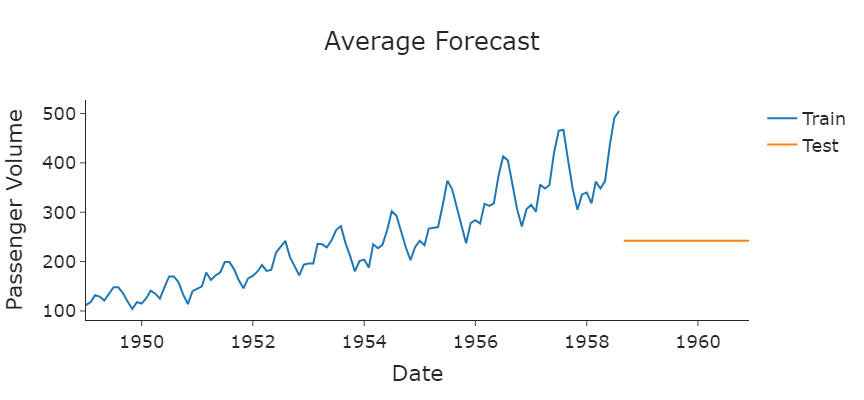

In [13]:
plot_func(test["mean_forecast"], "Average Forecast")

/tmp/ipykernel_14680/1144585780.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



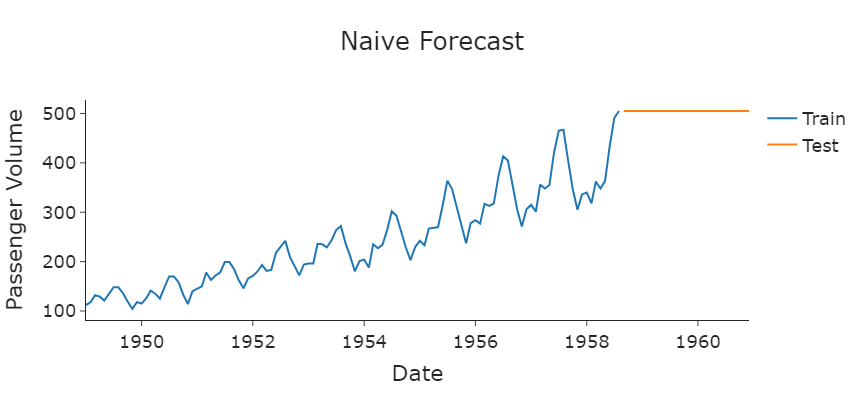

In [17]:
# Naive forecast
test["naive_forecast"] = train["#Passengers"].iloc[-1]
plot_func(test["naive_forecast"], "Naive Forecast")

/tmp/ipykernel_14680/294302301.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_14680/294302301.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



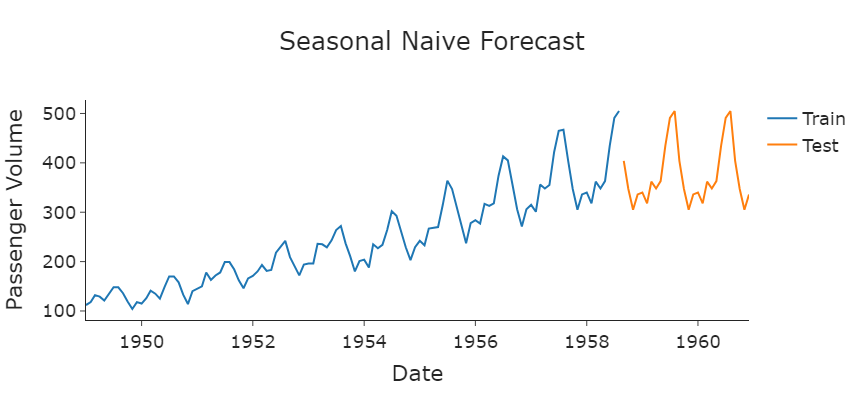

In [18]:
# Seasonal naive forecast
train["month_number"] = pd.DatetimeIndex(train["Month"]).month
test["month_number"] = pd.DatetimeIndex(test["Month"]).month

snaive_fc = []
for row_idx, row in test.iterrows():
    month = row["month_number"]
    forecast = train["#Passengers"].loc[train["month_number"] == month].iloc[-1]
    snaive_fc.append(forecast)

plot_func(snaive_fc, "Seasonal Naive Forecast")

/tmp/ipykernel_14680/683715947.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_14680/683715947.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



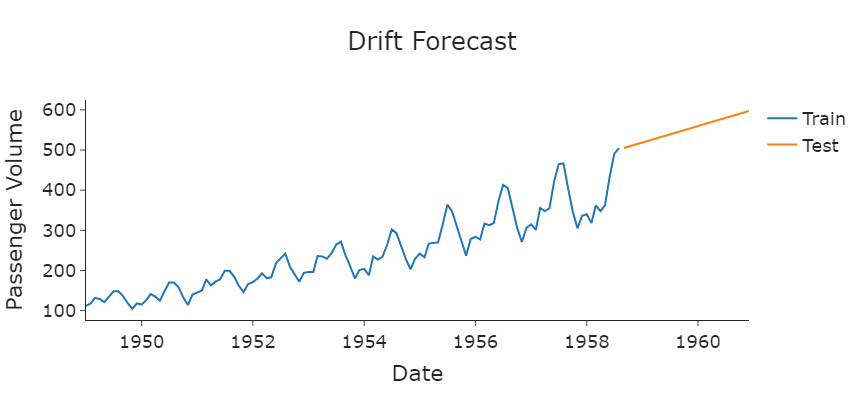

In [19]:
# Drift forecast
constant = (train["#Passengers"].iloc[-1] - train["#Passengers"].iloc[0]) / (
    len(train) - 1
)
test["h"] = range(len(test))
test["drift_forecast"] = train["#Passengers"].iloc[-1] + test["h"] * constant

plot_func(test["drift_forecast"], "Drift Forecast")